In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

from matplotlib import pyplot as plt

In [38]:
data_dir = "data"
# data_dir.mkdir(parents=True, exist_ok=True)
transform = transforms.Compose([
		transforms.ToTensor(),
		transforms.Normalize((0.1307,), (0.3081,)),
	])
test_ds = datasets.MNIST(str(data_dir), train=False, download=True, transform=transform)
test_loader = DataLoader(test_ds, batch_size=100, shuffle=False, num_workers=0)

In [39]:
x, y = next(iter(test_loader))

tensor(4)


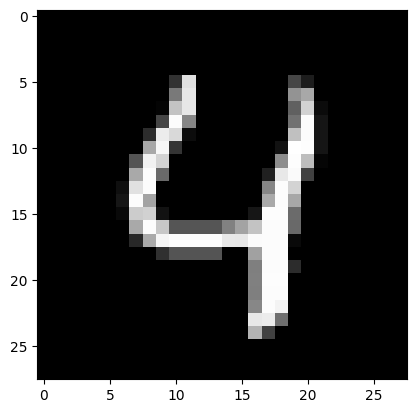

In [47]:
plt.imshow(x[4][0], cmap='gray')
print(y[4])

In [48]:
from mnist_pytorch import load_model, get_device
import torch
device = get_device()
model = load_model('models/mnist_best.pt', device)
model.eval()

# Example single image (from dataset)
from torchvision import datasets, transforms
ds = datasets.MNIST('data', train=False, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ]))
img, label = ds[0]
with torch.no_grad():
    pred = model(img.unsqueeze(0).to(device)).argmax(1).item()
print('Pred:', pred, 'Label:', label)

Pred: 7 Label: 7


In [56]:
torch.sigmoid(model(img.unsqueeze(0).to(device)))

tensor([[6.9781e-05, 2.8773e-01, 6.5824e-01, 5.1077e-01, 6.1763e-06, 1.1551e-03,
         5.3212e-05, 1.0000e+00, 1.7836e-02, 2.0866e-02]], device='cuda:0',
       grad_fn=<SigmoidBackward0>)

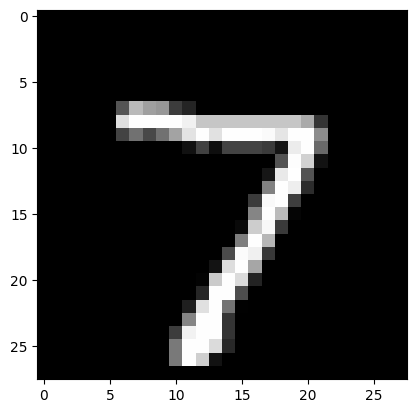

In [61]:
plt.imshow(img[0], cmap='gray')